## CSE5ML Pre_Lab 8 
### How does traditional machine learning methods work for classifying images?
We first have a look of how traditional methods can handle the images.

Note: this pre-lab 8 is not required in the class. I just want to show your how traditional way works, so later when you use neural network to do classification, you are able to tell the difference.

### Loading Image Dataset
The same dataset that we use later for deep neural network.

**Description of the dataset**:

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images (50,000 training images and 10,000 test images) in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [1]:
from keras.datasets import cifar10

#load dataset
(Inputs, Labels), (Test_Data, Test_Label) = cifar10.load_data()
print('Loaded CIFAR10 database with {} training and {} testing samples'.format(len(Labels), len(Test_Label)))

Using TensorFlow backend.


Loaded CIFAR10 database with 50000 training and 10000 testing samples


In [2]:
# investigate input data size
Inputs.shape

(50000, 32, 32, 3)

In [3]:
#check how many classes in the data
import numpy as np

np.unique(Labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
# you need to install scikit-image package if you want to run this cell
# Converting color images to greyscale, because for the scikit-image version available in Anaconda, the HOG descriptor we use later is not ablt to deal with color images
from skimage.color import rgb2gray

Xdata_training = [rgb2gray(image) for image in Inputs]
Xdata_testing  = [rgb2gray(image) for image in Test_Data]

**What the images looks like?**

Firt line is the original images, second line is the images after processing


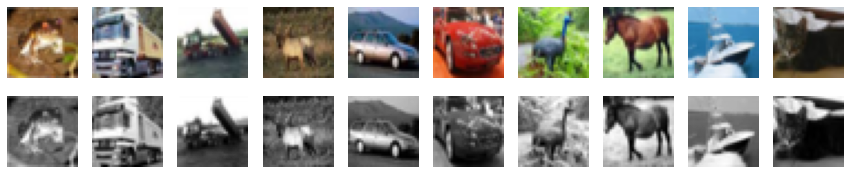

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# lets choose some random sample of 10 training images
fig, axarr = plt.subplots(2,10, figsize=(15,3))
for i in range(10):
    axarr[0,i].imshow(Inputs[i])
    axarr[0,i].axis('off')
    axarr[1,i].imshow(Xdata_training[i],cmap='gray')
    axarr[1,i].axis('off')
print('Firt line is the original images, second line is the images after processing')
plt.show()

### Feature extraction
We use HOG descriptor from scikit-image library.

**What is HOG (histogram of oriented gradients)?**

The essential thought behind the histogram of oriented gradients descriptor is that local object appearance and shape within an image can be described by the distribution of intensity gradients or edge directions. The image is divided into small connected regions called cells, and for the pixels within each cell, a histogram of gradient directions is compiled. The descriptor is the concatenation of these histograms. For improved accuracy, the local histograms can be contrast-normalized by calculating a measure of the intensity across a larger region of the image, called a block, and then using this value to normalize all cells within the block. This normalization results in better invariance to changes in illumination and shadowing. The HOG descriptor is particularly suited for human detection in images.

There are many other feature descriptors available, including edge orientation histograms, scale-invariant feature transform descriptors, and shape contexts.

In [6]:
# Configuring HOG descriptor
# see http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

# Configuration of HOG descriptor
from skimage.feature import hog

normalize = True          #  True ==> yields a little bit better score
block_norm = 'L2-Hys'     # or 'L1'
orientations = 9          # 
pixels_per_cell = [8, 8]
cells_per_block = [2, 2]

def extractFeature(img, vis=False):
    return hog(img, orientations, pixels_per_cell, cells_per_block, block_norm, visualize=vis, transform_sqrt=normalize)

### Visualization of HOG histograms

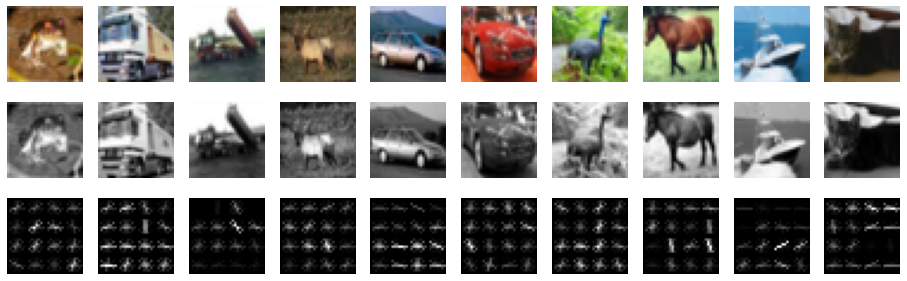

In [7]:
# visualize hog extracted features
fig, axarr = plt.subplots(3,10, figsize=(16,5))
for i in range(10):
    axarr[0,i].imshow(Inputs[i])
    axarr[0,i].axis('off')
    axarr[1,i].imshow(Xdata_training[i],cmap='gray')
    axarr[1,i].axis('off')
    _, hog_vis = extractFeature(Xdata_training[i], vis=True)
    axarr[2,i].imshow(hog_vis,cmap='gray')
    axarr[2,i].axis('off')
plt.show()

Because the image is in small size, so the hog descriptor did not oresent a very clear pattern, you can check this link: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py and see how a image looks like after using the HOG descriptor.

In [8]:
# feature extraction on training and testing data with the HOG descriptor
import numpy as np
X_training = np.array([extractFeature(Xdata_training[i], vis=False) for i in range(len(Labels))])
y_training = np.array([Labels[i][0] for i in range(len(Labels))])

X_testing = np.array([extractFeature(Xdata_testing[i], vis=False) for i in range(len(Test_Label))])
y_testing = np.array([Test_Label[i][0] for i in range(len(Test_Label))])

### Take a look at the training data

In [9]:
print( 'X_training shape is {}'.format( X_training.shape ) )
print( 'y_training shape is {}'.format( y_training.shape ) )
print( 'X_testing shape is {}'.format( X_testing.shape ) )
print( 'y_testing shape is {}'.format( y_testing.shape ) )

X_training shape is (50000, 324)
y_training shape is (50000,)
X_testing shape is (10000, 324)
y_testing shape is (10000,)


Basically this means that each original input image is now represented by a 324 dimensional vector after applying the HOG descriptor.

In [10]:
# get a summary table
import pandas as pd
print( 'X_training data description')
pd.DataFrame( X_training ).describe()

X_training data description


,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.134775,0.084065,0.090247,0.101863,0.170979,0.089787,0.072886,0.069375,0.082823,0.146428,...,0.102411,0.133809,0.086841,0.094316,0.115804,0.184671,0.094256,0.077198,0.075015,0.083896
std,0.095435,0.082482,0.084387,0.087177,0.100646,0.083777,0.076555,0.075414,0.086553,0.098336,...,0.092840,0.091044,0.080511,0.082150,0.090782,0.098025,0.081832,0.076847,0.076567,0.083684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047639,0.015691,0.020721,0.028874,0.083403,0.020698,0.012022,0.009337,0.011261,0.056107,...,0.023243,0.054990,0.022174,0.028133,0.041645,0.102124,0.028645,0.018001,0.015195,0.016669
50%,0.121763,0.058237,0.065210,0.079038,0.172889,0.065365,0.046805,0.042925,0.052685,0.140408,...,0.075851,0.117729,0.062588,0.070867,0.093174,0.189224,0.072339,0.052482,0.049568,0.056092
75%,0.224464,0.128160,0.136385,0.156396,0.253333,0.136784,0.109354,0.104227,0.128546,0.237560,...,0.162375,0.211198,0.129652,0.140026,0.175780,0.262175,0.139101,0.111492,0.110241,0.126847
max,0.613041,0.502988,0.549351,0.520089,0.678826,0.488888,0.525644,0.446331,0.541864,0.591207,...,0.603060,0.656008,0.454380,0.438543,0.504783,0.690268,0.468844,0.526123,0.448126,0.502214


In [11]:
print( 'y_training data description')
pd.DataFrame( y_training ).describe()

y_training data description


,0
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000


### Classification
We simply use SVC from scikit-learn library as learned in lab 5C.

Note: It may take some time to train the model, since it is relatively big dataset with high dimensions.

In [12]:
from sklearn.svm import SVC

model = SVC(kernel="linear")

### Training

In [13]:
# this may take some time
model.fit(X_training, y_training)

SVC(kernel='linear')

### Testing and score
We obtain 0.5365 score on CIFAR10 testing dataset.

In [14]:
model.score( X_testing, y_testing )

0.5365

In [15]:
y_predict = model.predict( X_testing )
# summarize the first 5 cases
for i in range(5):
    print('case %d => %d (expected %d)' % (i, y_predict[i], y_testing[i]))

case 0 => 6 (expected 3)
case 1 => 8 (expected 8)
case 2 => 1 (expected 8)
case 3 => 0 (expected 0)
case 4 => 3 (expected 6)
